## Load Data from CSVs

In [30]:
import unicodecsv
import numpy as np
## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [31]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

with open('daily_engagement.csv','rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)
with open('project_submissions.csv','rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)
            

In [32]:
daily_engagement[0]


OrderedDict([('acct', '0'),
             ('utc_date', '2015-01-09'),
             ('num_courses_visited', '1.0'),
             ('total_minutes_visited', '11.6793745'),
             ('lessons_completed', '0.0'),
             ('projects_completed', '0.0')])

## Fixing Data Types

In [33]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else: 
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [34]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [35]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

## Investigating the Data

In [36]:
#####################################
#                 2                 #
#####################################

number = len(set([x['account_key'] for x in project_submissions]))
number


743

## Problems in the Data

In [37]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for x in daily_engagement:
    x['account_key']=x.pop('acct')

daily_engagement[0]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0')])

## Missing Engagement Records

In [38]:
#for engagement in daily_engagement:
 #   engagement['account_key'] = engagement['acct']
  #  del engagement['acct']

In [39]:
#####################################
#                 4                 #
#####################################
daily_engagement_account_keys = set([x['account_key'] for x in daily_engagement])

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

for enrollment in enrollments:
    if enrollment['account_key'] not in daily_engagement_account_keys:
        print(enrollment)
        break #veo uno solo

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


## Checking for More Problem Records

In [40]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

for enrollment in enrollments:
    if enrollment['account_key'] not in daily_engagement_account_keys:
        try:
            if enrollment['days_to_cancel']>0:
                print(enrollment)
        except:
            if enrollment['days_to_cancel'] is None:
                print(enrollment)
                
    
        


OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])


## Tracking Down the Remaining Problems

In [41]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [42]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [43]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))


1622
135656
3634


## Refining the Question

In [44]:
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [45]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.
paid_students = {}
for x in non_udacity_enrollments:
    try:
        if x['days_to_cancel']> 7:
                paid_students[x['account_key']]=x['join_date']
    except:
        if x['days_to_cancel'] is None:
                paid_students[x['account_key']]=x['join_date']

len(paid_students)


995

## Getting Data from First Week

In [46]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days>= 0

In [47]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
#print(non_udacity_engagement [0])
paid_engagement_in_first_week = [x for x in non_udacity_engagement if (x['account_key'] \
                                in paid_students.keys() \
                                and within_one_week(paid_students[x['account_key']],\
                                x['utc_date']))]
                                
print(len(paid_engagement_in_first_week))

paid_engagement_in_first_week[0]

6920


OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0')])

## Exploring Student Engagement

In [48]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [49]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes


In [50]:
import numpy as np

# Summarize the data about minutes spent in the classroom


In [51]:
def print_stats(dict):
    values_array = np.array(list(dict.values()))

    print('Mean:', np.mean(values_array))
    print('Standard deviation:', np.std(values_array))
    print('Minimum:', np.min(values_array))
    print('Maximum:', np.max(values_array))

print_stats(total_minutes_by_account)

Mean: 305.4147189083705
Standard deviation: 405.91261032004155
Minimum: 0.0
Maximum: 3564.7332644989997


## Debugging Data Analysis Code

In [52]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

print(max_minutes)

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print(engagement_record)

3564.7332644989997
OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 13, 0, 0)), ('num_courses_visited', 3), ('total_minutes_visited', 471.2139785), 

## Lessons Completed in First Week

In [53]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
total_lessons_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_lessons = 0
    for engagement_record in engagement_for_student:
        total_lessons += engagement_record['lessons_completed']
    total_lessons_by_account[account_key] = total_lessons

In [54]:
total_lessons = np.array(list((total_lessons_by_account.values())))

print_stats(total_lessons_by_account)


Mean: 1.6321608040201006
Standard deviation: 3.0014018256251003
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [55]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
total_visits_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_visits=0
    for engagement in engagement_for_student:
        if int(engagement['num_courses_visited'])>0:
            total_visits+=1
    total_visits_by_account[account_key]=total_visits

In [56]:
print_stats(total_visits_by_account)


Mean: 2.912562814070352
Standard deviation: 2.22037005490701
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [60]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']
passing_students=set()
for submission in non_udacity_submissions:
    if (submission['lesson_key'] in subway_project_lesson_keys \
        and submission['assigned_rating']=='PASSED'):
        passing_students.add(submission['account_key'])
        
passing_engagement=[]
non_passing_engagement =[]
for engagement in non_udacity_engagement:
    if engagement['account_key'] in passing_students:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)



In [61]:
passing_ratings = ['PASSED', 'DISTINCTION']

passing_students = set()
for submission in non_udacity_submissions:
    if submission['assigned_rating'] in passing_ratings and \
       submission['lesson_key'] in subway_project_lesson_keys:
        passing_students.add(submission['account_key'])

passing_engagements = []
non_passing_engagements = []
for account, engagements in engagement_by_account.items():
    if account in passing_students:
        passing_engagements += engagements
    else:
        non_passing_engagements += engagements
    
print(len(passing_engagements))
print(len(non_passing_engagements))


4528
2392


In [62]:

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

## Comparing the Two Student Groups

In [63]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

passing_engaments_by_account = defaultdict(list)
non_passing_engaments_by_account = defaultdict(list)
for account, engagement in engagement_by_account.items():
    if account in passing_students:
        passing_engaments_by_account[account]=engagement
    else:
        non_passing_engaments_by_account[account]=engagement

In [64]:
def attribute_sum(data,attribute):
    total_attribute_by_account = {}
    for account_key, engagement_for_student in data.items():
        total_attribute = 0
        for engagement_record in engagement_for_student:
            total_attribute += engagement_record[attribute]
        total_attribute_by_account[account_key] = total_attribute

    return total_attribute_by_account


    

In [65]:
print_stats(attribute_sum(passing_engaments_by_account,'total_minutes_visited'))

Mean: 391.4817223250881
Standard deviation: 439.6530617261367
Minimum: 0.0
Maximum: 3564.7332644989997


In [66]:
print_stats(total_lessons_by_account_passed)
print_stats(total_lessons_by_account)
print_stats(total_lessons_by_account_non_passed)

NameError: name 'total_lessons_by_account_passed' is not defined

In [67]:
total_visits_by_account_passed = {}
for account_key, engagement_for_student in engagement_by_account_passed.items():
    total_visits=0
    for engagement in engagement_for_student:
        if int(engagement['num_courses_visited'])>0:
            total_visits+=1
    total_visits_by_account_passed[account_key]=total_visits

total_visits_by_account_non_passed = {}
for account_key, engagement_for_student in engagement_by_account_non_passed.items():
    total_visits=0
    for engagement in engagement_for_student:
        if int(engagement['num_courses_visited'])>0:
            total_visits+=1
    total_visits_by_account_non_passed[account_key]=total_visits    


NameError: name 'engagement_by_account_passed' is not defined

In [68]:
print_stats(total_visits_by_account_passed)
print_stats(total_visits_by_account_non_passed)

Mean: nan
Standard deviation: nan


/home/javier/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/javier/.local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/javier/.local/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/javier/.local/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/javier/.local/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: zero-size array to reduction operation minimum which has no identity

## Making Histograms

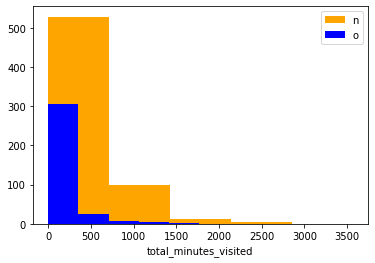

In [69]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
data = [1, 2, 1, 3, 3, 1, 4, 2]

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot=(,)
plt.xlabel('total_minutes_visited')
plt.hist(,bins=5,color='orange')
plt.legend('passed')
plt.hist(attribute_sum(non_passing_engaments_by_account,'total_minutes_visited').values(),bins=5,color='blue')
plt.legend('not-passed')


(array([  0.,   0.,   0.,   0.,   0., 348.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

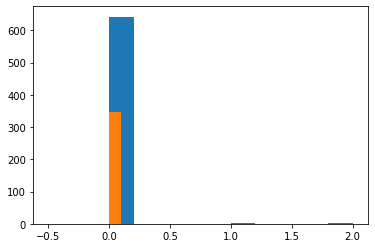

In [70]:
plt.hist(attribute_sum(passing_engaments_by_account,'projects_completed').values())
plt.hist(attribute_sum(non_passing_engaments_by_account,'projects_completed').values())

(array([317.,  17.,   6.,   4.,   1.,   1.,   0.,   1.,   0.,   1.]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <a list of 10 Patch objects>)

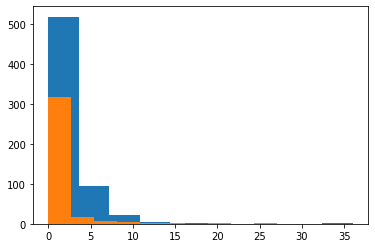

In [71]:
plt.hist(attribute_sum(passing_engaments_by_account,'lessons_completed').values())
plt.hist(attribute_sum(non_passing_engaments_by_account,'lessons_completed').values())

## Improving Plots and Sharing Findings

In [72]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.